# 1. Exploring the Dataset

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
def get_data():
    
    #Importing CSV
    file_path = '/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/data/attacks.csv'
    
    # Try reading the file with a different encoding
    data = pd.read_csv(file_path, encoding='latin1')

    return data

data = get_data()
# data.head(5)

In [226]:
#Initial Data Shape
data.shape

(25723, 24)

In [227]:
#Type of data in the Dataset
data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [228]:
#Getting columns information to formulate research questions
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## 2. Pre-processing

In [306]:
#Evaluating null values in the dataset to make an initial cleaning. Values are sorted in descending order.

def inspect_missing_values(data):

    missing_values = data.isnull().sum()
    missing_percent = (missing_values /len(data))*100
    missing_data = pd.DataFrame({"Total values missing": missing_values, "Percentage": missing_percent})
    missing_data = missing_data[missing_data["Total values missing"] > 0].sort_values(by = "Total values missing", ascending = False)
    
    return missing_data

missing_data = inspect_missing_values(data)
missing_data

,Total values missing,Percentage
Unnamed: 22,25722,99.996112
Unnamed: 23,25721,99.992225
Time,22775,88.539439
Species,22259,86.533453
Age,22252,86.506240
Sex,19986,77.697003
Activity,19965,77.615364
Location,19961,77.599813
Fatal (Y/N),19960,77.595926
Area,19876,77.269370


In [307]:
def clean_data(data):
    
    #dropping columns with 99% missing values and the ones that aren't relevant for my research
    cleaned_data = data.drop(columns = ['Unnamed: 22', 'Unnamed: 23','Time','Species ','Age', 'Name', 'Investigator or Source','href formula','pdf','href','original order', 'Case Number.1', 'Case Number.2','Case Number'], axis = 1)
    
    #dropping all rows with NaN in every column
    cleaned_data = cleaned_data.dropna(how="all")
    
    return cleaned_data

cleaned_data = clean_data(data)
cleaned_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y


In [312]:
def standardize_fatal_column(data):
    
    #Changing the column name to a simpler one
    renamed_data = data.rename(columns= {'Fatal (Y/N)':'Fatal'})
    
    return renamed_data

cleaned_data = standardize_fatal_column(cleaned_data)
cleaned_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y
6298,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y
6299,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y
6300,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y


In [313]:
def convert_date(data):
    
    #Converting the 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
    
    return data

cleaned_data = convert_date(cleaned_data)
cleaned_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y
6298,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y
6299,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y
6300,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y


In [314]:
def casting_year(data):
    
    #Filling nan values with a placeholder = 0 in column 'Year' and converting data type to integer
    data['Year'] = data['Year'].fillna(0).astype(int)
  
    return data

cleaned_data = casting_year(cleaned_data)
cleaned_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y
6298,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y
6299,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y
6300,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y


## 3. Transforming the Data

In [324]:
def extract_date(data):
    
    #Extracting Month from Date column
    cleaned_data['Month'] = cleaned_data['Date'].dt.month

    #Extracting Day of the week from 0 to 6 from Date column. 0 = Monday, 6 = Sunday
    cleaned_data['Day'] = cleaned_data['Date'].dt.dayofweek
    
    return cleaned_data
    
cleaned_data = extract_date(cleaned_data)
cleaned_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Month,Day
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,6.0,0.0
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,6.0,0.0
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,6.0,5.0
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,6.0,4.0
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y,NaN,NaN
6298,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y,NaN,NaN
6299,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y,NaN,NaN
6300,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y,NaN,NaN


In [432]:
def first_research_year(data):
    
    #Filtering Year to show rows that includes values equal or grater than 1900 as it seems more relevant, just loosing 753 values (values that seem are not correct)
    data_filtered = cleaned_data[cleaned_data['Year'] >= 1900]
    
    #Group by year and count the number of incidents in each year
    attacks_per_year = data_filtered.groupby('Year').size()
    
    return attacks_per_year

attacks_per_year = first_research_question(cleaned_data)
attacks_per_year.head
    

<bound method NDFrame.head of Year
1900     13
1901      9
1902     15
1903     10
1904     14
       ... 
2014    127
2015    143
2016    130
2017    136
2018     53
Length: 119, dtype: int64>

In [434]:

def first_research_month(data):
    
    #Filtering Year to show rows that includes values equal or grater than 1900 as it seems more relevant, just loosing 753 values (values that seem are not correct)
    data_filtered = cleaned_data[cleaned_data['Year'] >= 1900]
    
    #Group by year and count the number of incidents in each year
    attacks_per_month = data_filtered.groupby('Month').size()
    
    return attacks_per_month

attacks_per_month = first_research_month(cleaned_data)
attacks_per_month.head
    

<bound method NDFrame.head of Month
1.0     411
2.0     305
3.0     324
4.0     361
5.0     304
6.0     388
7.0     506
8.0     463
9.0     426
10.0    361
11.0    313
12.0    343
dtype: int64>

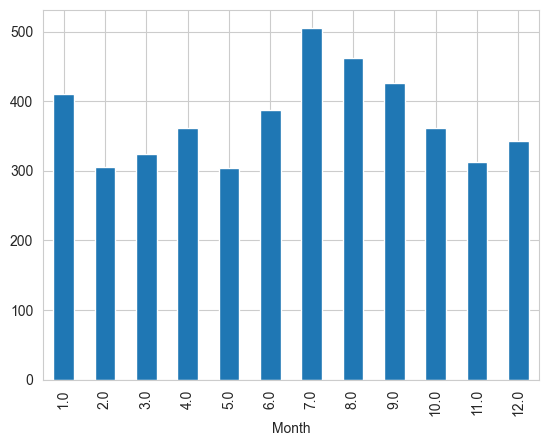

In [435]:
attacks_per_month.plot(kind='bar')
plt.show()


<Axes: title={'center': 'Number of Shark Attacks Over Time'}, xlabel='Year', ylabel='Number of Attacks'>

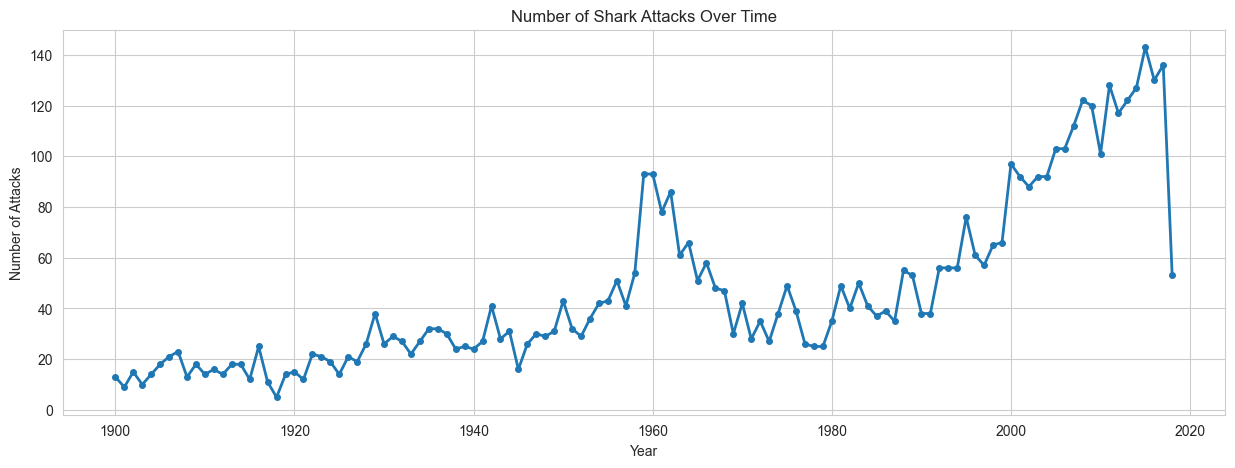

In [429]:
#set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize = (15,5))
attacks_per_year.plot(title= "Number of Shark Attacks Over Time", xlabel= "Year",
                      ylabel = "Number of Attacks", linewidth = 2, marker = "o", markersize = 4)

NameError: name 'data_filtered' is not defined

In [406]:
filtered_year = cleaned_data[(cleaned_data['Year'] >= 0) & (cleaned_data['Year']< 2023) ]
filtered_year

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Month,Day
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,6.0,0.0
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,6.0,0.0
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,6.0,5.0
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,6.0,4.0
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y,NaN,NaN
6298,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y,NaN,NaN
6299,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y,NaN,NaN
6300,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y,NaN,NaN


In [328]:
looking = cleaned_data['Date'].unique()
looking

<DatetimeArray>
['2018-06-25 00:00:00', '2018-06-18 00:00:00', '2018-06-09 00:00:00',
 '2018-06-08 00:00:00', '2018-06-04 00:00:00', '2018-06-03 00:00:00',
 '2018-05-27 00:00:00', '2018-05-26 00:00:00', '2018-05-24 00:00:00',
 '2018-05-21 00:00:00',
 ...
 '1807-01-12 00:00:00', '1792-09-12 00:00:00', '1788-05-10 00:00:00',
 '1787-07-05 00:00:00', '1784-12-12 00:00:00', '1783-03-02 00:00:00',
 '1780-08-08 00:00:00', '1751-07-27 00:00:00', '1742-12-17 00:00:00',
 '1703-03-26 00:00:00']
Length: 4178, dtype: datetime64[ns]

In [384]:
sample = data['Date'].sample(10)
sample

1344              19-Aug-2007
24236                     NaN
3330     Reported 26-Jun-1972
18580                     NaN
1464              08-Jul-2006
11841                     NaN
20949                     NaN
10180                     NaN
9996                      NaN
10177                     NaN
Name: Date, dtype: object

In [358]:
lenght = cleaned_data['Date'].nunique()
lenght

4177

In [282]:
value_counts = cleaned_data['Year'].value_counts()
zero_counts = value_counts[0.0]
zero_counts

125

In [317]:
nan_count = cleaned_data['Date'].isna().sum()
nan_count

1537

In [263]:
data = data.drop(drop_cols, axis =1)

NameError: name 'drop_cols' is not defined